<a href="https://colab.research.google.com/github/Schryzon/MachineLearning-Pemula/blob/master/Visualisasi_Data_Probstat_A_(Team_SIGMA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Probability & Statistics Assignment***
## **Data Visualization (A)**
By:
```
I Nyoman Widiyasa Jayananda     (F1D02410053) - Leader
Thoriq Abdillah Falian Kusuma   (F1D02410098)
Septania Sybil Shofiyah         (F1D02410094)
Abdurrahman Karim               (F1D02410031)
I Kadek Mahesa Permana Putra    (F1D02410052)
```

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Ignore graph warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv("data_mahasiswa_processed.csv", on_bad_lines='warn')
df.info()

# Copy the dataset into other variables
unencoded_data = df.copy()
encoded_data = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   NIM                    55 non-null     object
 1   Fakultas               55 non-null     object
 2   Program Studi          55 non-null     object
 3   Semester               55 non-null     int64 
 4   Grade UKT              55 non-null     object
 5   Kesesuaian Grade UKT   55 non-null     object
 6   Penghasilan            55 non-null     int64 
 7   Penghasilan Ortu/Wali  55 non-null     int64 
 8   Beasiswa               55 non-null     object
 9   Kepuasan               55 non-null     int64 
dtypes: int64(4), object(6)
memory usage: 4.4+ KB


In [ ]:
# Set purple as the primary color
purple = "#800080"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[purple])

df.describe()

,Semester,Penghasilan,Penghasilan Ortu/Wali,Kepuasan
count,55.000000,55.000000,5.500000e+01,55.000000
mean,2.109091,1954.545455,3.883646e+06,2.745455
std,0.598539,14495.297043,5.636269e+06,1.158194
min,2.000000,0.000000,0.000000e+00,1.000000
25%,2.000000,0.000000,1.000000e+06,2.000000
50%,2.000000,0.000000,3.000000e+06,3.000000
75%,2.000000,0.000000,4.000000e+06,3.000000
max,6.000000,107500.000000,3.000000e+07,5.000000


## Data Insights

---

### 1. Semester
- **Count**: 55  
- **Mean**: ~2.11  
- **Std**: ~0.60  
- **Min/Max**: 2 / 6  

**Interpretation**:  
- Most entries (75% or more) are in Semester 2, given the min is 2, the 75% percentile is 2, and the mean is slightly above 2.  
- A small portion of students are in semesters 3 to 6, indicating the dataset is largely first-year or early second-year students.

---

### 2. Penghasilan (Student Income)
- **Count**: 55  
- **Mean**: ~1,954.55  
- **Std**: ~14,495.30  
- **Min/Max**: 0 / 107,500  

**Interpretation**:  
- The **median** (50% percentile) is 0, and the 75% percentile is also 0, suggesting that most students have no personal income.  
- A very high **max** (107,500) combined with a large standard deviation implies a highly skewed distribution: a small number of students report significantly higher incomes.

---

### 3. Penghasilan Ortu/Wali (Parent/Wali Income)
- **Count**: 55  
- **Mean**: ~3,883,646  
- **Std**: ~5,636,269  
- **Min/Max**: 0 / 30,000,000  

**Interpretation**:  
- The median is 3,000,000, and the 75% percentile is 4,000,000. This indicates a broad range of parental incomes, with many in the 1M–4M range.  
- The max is 30M, which significantly increases the mean and suggests a few outliers with very high incomes.  
- Some entries have a 0 value, which represent no data, extremely low income, or special cases (like scholarships covering everything).

---

### 4. Kepuasan (Satisfaction)
- **Count**: 55  
- **Mean**: ~2.74  
- **Std**: ~1.16  
- **Min/Max**: 1 / 5  

**Interpretation**:  
- The median (50% percentile) is 3, which is near the mean. Most students rate their satisfaction around 2 or 3.  
- There’s a reasonable spread (1 to 5), but overall satisfaction tends to cluster in the mid-range.

---

## Key Takeaways
1. **Semester Distribution**: The dataset is dominated by second-semester students, with only a handful in higher semesters.  
2. **Student Income Skew**: A small fraction of students have very high personal incomes, but the majority report zero income.  
3. **Parent/Wali Income Spread**: While the typical parental income is around 3–4 million, some families earn substantially more, creating a wide distribution.  
4. **Moderate Satisfaction**: Satisfaction levels hover around the mid-range, indicating there may be room for improvement in student experience.

---

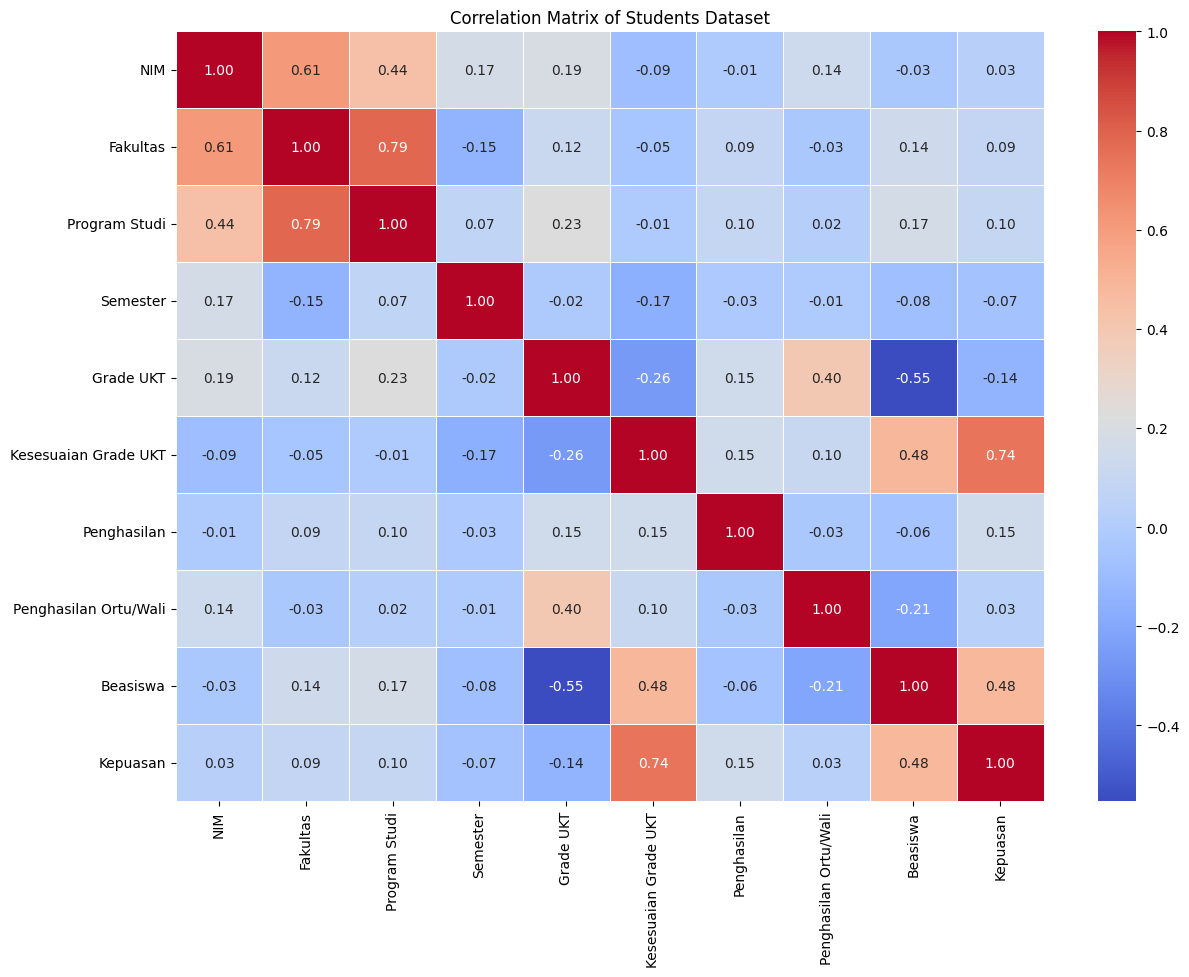

In [ ]:
# Compute the correlation matrix
# Initialize the label encoder (necessary)
le = LabelEncoder()

# Apply label encoding to categorical columns
categorical_columns = ['NIM','Fakultas','Program Studi','Grade UKT','Kesesuaian Grade UKT','Beasiswa']
for column in categorical_columns:
    encoded_data[column] = le.fit_transform(encoded_data[column])
corr_matrix = encoded_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Students Dataset')
plt.show()

# Heatmap  
## Relationship Between "Parental Income" and "UKT Grade"  

- If the correlation is strongly positive (e.g., +0.7), it means that the higher the parental income, the higher the UKT grade of the student.  
- If the correlation is low or negative, then parental income does not significantly affect the UKT grade.  

## Relationship Between "Scholarship" and "Parental Income"  

- If the correlation is strongly negative (e.g., -0.8), it means that students with lower parental income are more likely to receive scholarships.  
- If the correlation is low or close to zero, it means that scholarships are not significantly influenced by parental income.  

## Relationship Between "Student Satisfaction" and "Parental Income"  

- If the correlation is positive, it may indicate that students from wealthier families tend to have higher satisfaction levels.  
- If the correlation is negative or low, it means that student satisfaction is not dependent on economic conditions.  

## Relationship Between "Student Satisfaction" and "Scholarship"  

- If the correlation is strongly positive, it means that scholarships play a significant role in increasing student satisfaction.  
- If there is no significant correlation, it may indicate that satisfaction is more influenced by other factors such as the campus environment or teaching methods.

---

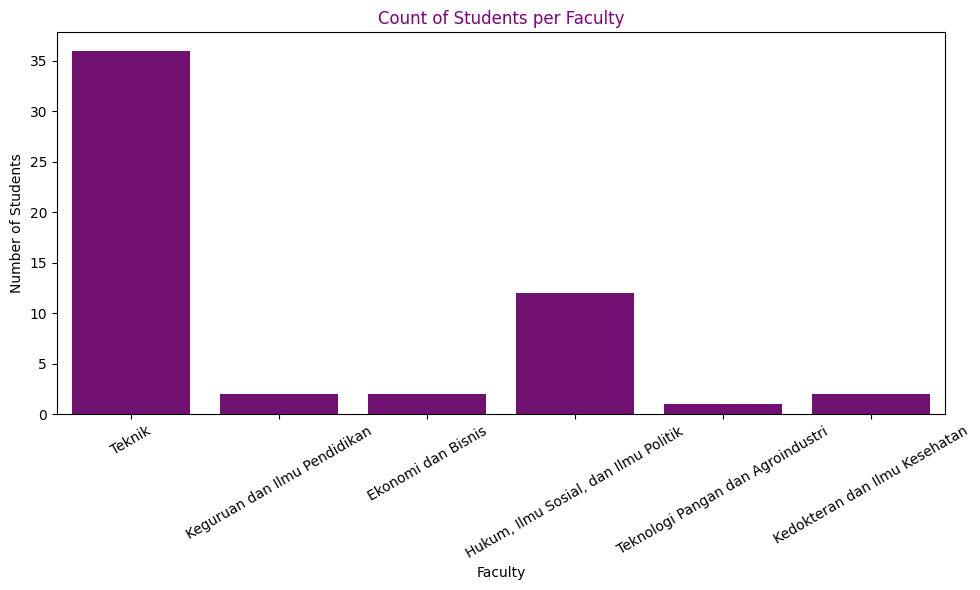

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=unencoded_data, x="Fakultas", color=purple)
plt.xticks(rotation=30)
plt.ylabel("Number of Students")
plt.xlabel("Faculty")
plt.title("Count of Students per Faculty", color=purple)
plt.tight_layout()
plt.show()

# Bar Chart (Count of Students per Faculty)
### Distribution of Student Enrollment Across Faculties  

This bar chart visualizes the *number of students in each faculty* within the dataset. The x-axis represents different *faculties* (Fakultas), while the y-axis indicates the *count of students*.  

### *1. Key Observations*  
- Certain faculties have *significantly higher student enrollment* compared to others.  
- Faculties with *lower student counts* may indicate either smaller departments or more selective admission criteria.  
- Faculties with *larger student populations* could have broader academic programs or higher demand.  

### *2. Possible Factors Influencing Student Distribution*  
- *Program Popularity*: Some faculties may attract more students due to high demand in certain fields.  
- *Capacity and Resources*: Faculties with more facilities and faculty members may accommodate a larger number of students.  
- *Admission Selectivity*: Certain faculties may have stricter admission requirements, leading to lower enrollment numbers.  

### *3. Insights and Implications*  
- *Understanding student distribution* across faculties can help in resource allocation, faculty planning, and academic support services.  
- Faculties with *overcrowding* may need *additional infrastructure or faculty expansion*.  
- Faculties with *low enrollment* might benefit from *better outreach programs* to attract more students.  

### *4. Conclusion*  
The distribution of students across faculties provides a *crucial insight into academic preferences and institutional planning. Further investigation into the **factors driving student enrollment trends* can help universities *optimize resource allocation and improve academic experiences*.

---

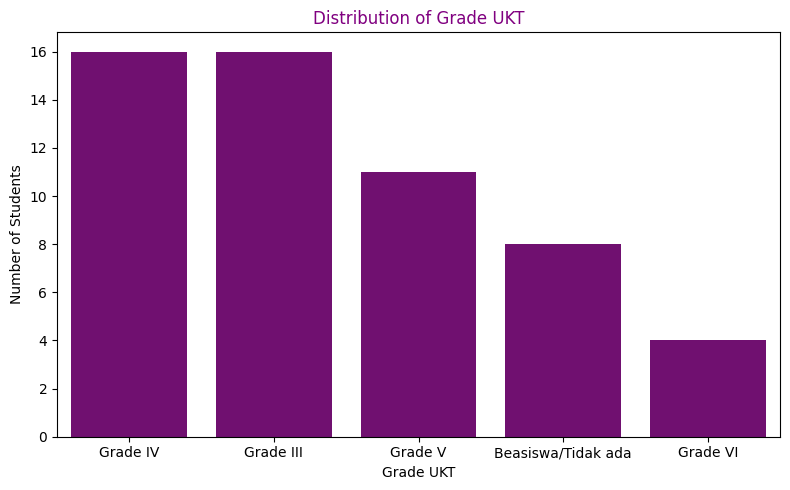

In [ ]:
# Distribution of Grade UKT
plt.figure(figsize=(8,5))
sns.countplot(data=unencoded_data, x="Grade UKT",
              order=unencoded_data["Grade UKT"].value_counts().index,
              color=purple)
plt.title("Distribution of Grade UKT", color=purple)
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

# Bar Chart (Distribution of Grade UKT)

### Observations:
- *Grade IV and Grade III* have the highest number of students, both with *16 students*.
- *Grade V* follows with *11 students*, indicating a moderate distribution in this tier.
- *Beasiswa/Tidak ada (Scholarship/No Fee)* accounts for *8 students*, reflecting the number of students receiving financial aid.
- *Grade VI* has the lowest number of students (*4 students*), implying that fewer students are in the highest tuition bracket.

### Conclusion:
The majority of students fall within *Grade III and IV, suggesting that most students pay mid-range tuition fees. The relatively lower numbers in **Grade VI and Beasiswa* indicate that fewer students either receive financial aid or pay the highest tuition fees.

---

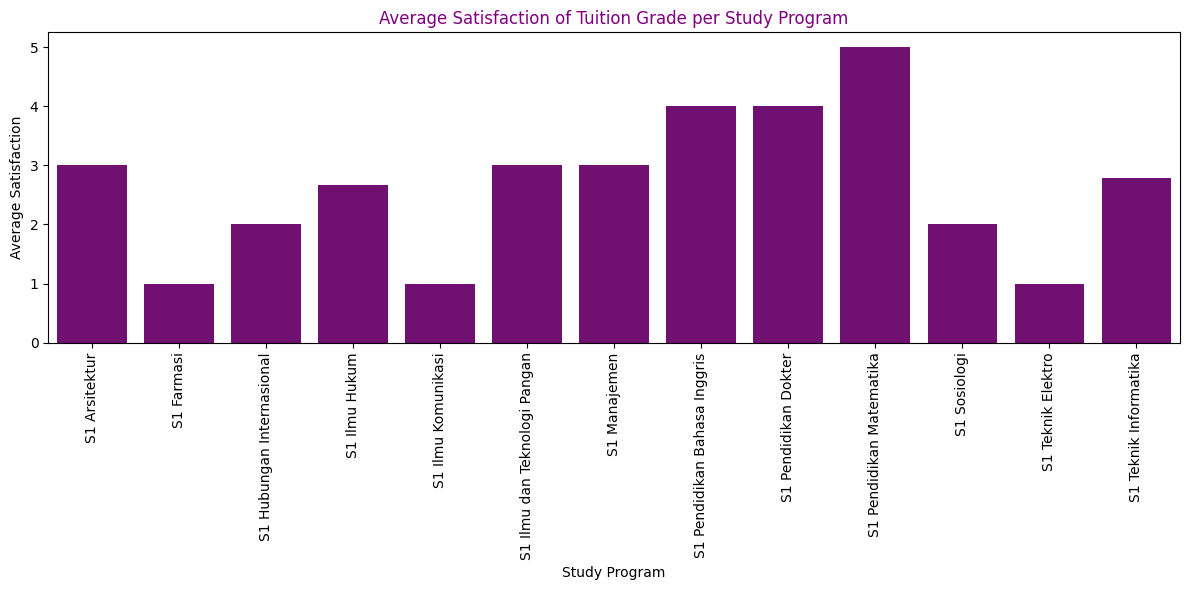

In [ ]:
# Calculate average satisfaction per Program Studi
avg_kepuasan = unencoded_data.groupby("Program Studi")["Kepuasan"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_kepuasan, x="Program Studi", y="Kepuasan", color=purple)
plt.xticks(rotation=90)
plt.ylabel("Average Satisfaction")
plt.xlabel("Study Program")
plt.title("Average Satisfaction of Tuition Grade per Study Program", color=purple)
plt.tight_layout()
plt.show()

# Bar Chart (Average Satisfaction of Tuition Grade per Study Program)

### Observations:
- *S1 Pendidikan Matematika* has the highest satisfaction, exceeding *5.0*, indicating students in this program are the most content with tuition fees.
- *S1 Pendidikan Dokter* and *S1 Pendidikan Bahasa Inggris* also show high satisfaction, suggesting that students in medical and language education programs generally feel their tuition is justified.
- On the lower end, *S1 Farmasi, **S1 Teknik Elektro, and **S1 Ilmu Komunikasi* have the lowest satisfaction scores, highlighting concerns about tuition value in these fields.
- *S1 Teknik Informatika* and *S1 Arsitektur* are around the middle range, showing moderate satisfaction.

### Conclusion:
The data suggests that tuition satisfaction varies widely among study programs. High satisfaction in *Pendidikan Matematika and Dokter* may indicate better funding, perceived value, or financial support, while dissatisfaction in *Farmasi and Teknik Elektro* could point to financial strain or unmet expectations.

---

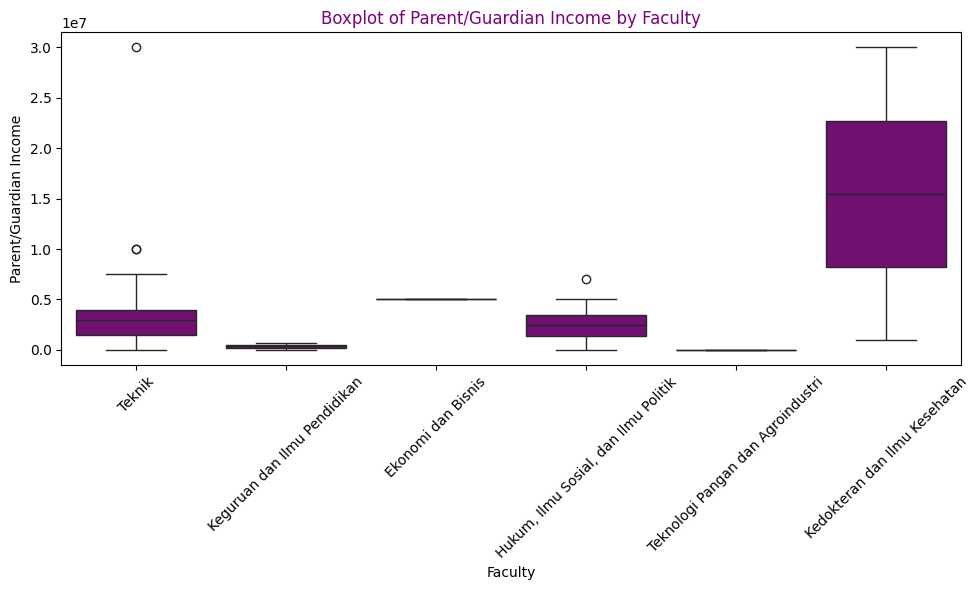

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=unencoded_data, x="Fakultas", y="Penghasilan Ortu/Wali", color=purple)
plt.xticks(rotation=45)
plt.ylabel("Parent/Guardian Income")
plt.xlabel("Faculty")
plt.title("Boxplot of Parent/Guardian Income by Faculty", color=purple)
plt.tight_layout()
plt.show()

# Boxplot of Parent/Guardian Income per Faculty
## *Key Insights:*
- The *middle thin line inside each box represents the median* income for each faculty.
- *Faculty of Medicine and Health Sciences (Kedokteran dan Ilmu Kesehatan)* has the highest median and widest income distribution, indicating *significant income disparity* among parents/guardians.
- *Faculty of Engineering (Teknik)* and *Faculty of Law, Social Sciences, and Politics (Hukum, Ilmu Sosial, dan Ilmu Politik)* show moderate income distribution, with some *outliers at the upper end*.
- *Faculty of Education (Keguruan dan Ilmu Pendidikan)* and *Faculty of Food Technology and Agroindustry (Teknologi Pangan dan Agroindustri)* have the *lowest income levels* with little variation.
- *Outliers (dots outside the whiskers)* indicate families with *exceptionally high incomes* compared to the majority.

## *Analysis & Implications:*
- The significant income disparity, especially in the *Medicine and Engineering faculties, suggests a **wide socioeconomic gap* among students.
- Faculties with lower median incomes may require *more financial aid or scholarships* to support students from lower-income backgrounds.
- Further investigation is needed to understand how *income levels correlate with tuition affordability and academic performance*.

---

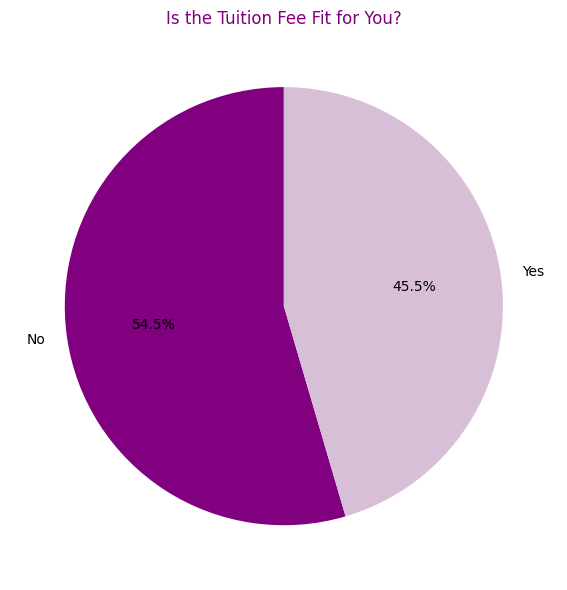

In [ ]:
plt.figure(figsize=(6,6))
ukt_counts = unencoded_data['Kesesuaian Grade UKT'].value_counts()

# Map the labels: change "Ya" to "Yes" and "Tidak" to "No"
label_mapping = {"Ya": "Yes", "Tidak": "No"}
new_labels = [label_mapping.get(label, label) for label in ukt_counts.index]

# Use purple for one slice and a complementary light purple for the other
plt.pie(ukt_counts, labels=new_labels,
        colors=[purple, "#D8BFD8"], autopct='%1.1f%%', startangle=90)
plt.title("Is the Tuition Fee Fit for You?", color=purple)
plt.tight_layout()
plt.show()

# Pie Chart: Tuition Fee Affordability Survey  

## *Pie Chart Analysis: "Is the Tuition Fee Fit for You?"*  

### *Key Findings:*  
- *54.5% of students answered "No"*  
  - More than half of the respondents feel that the tuition fee is *not affordable or not justified* for the services they receive.  
- *45.5% of students answered "Yes"*  
  - A *significant portion of students* still find the tuition fee reasonable.  

### *Analysis:*  
- The results indicate a *nearly even split, but with a slight majority feeling **financial strain* regarding tuition fees.  
- Institutions might need to *re-evaluate their tuition structure, offer more **scholarships*, or improve financial aid programs.  
- Further research could explore *why students find tuition fees unfit—whether due to **high costs, lack of financial support, or dissatisfaction with educational services*.  

---


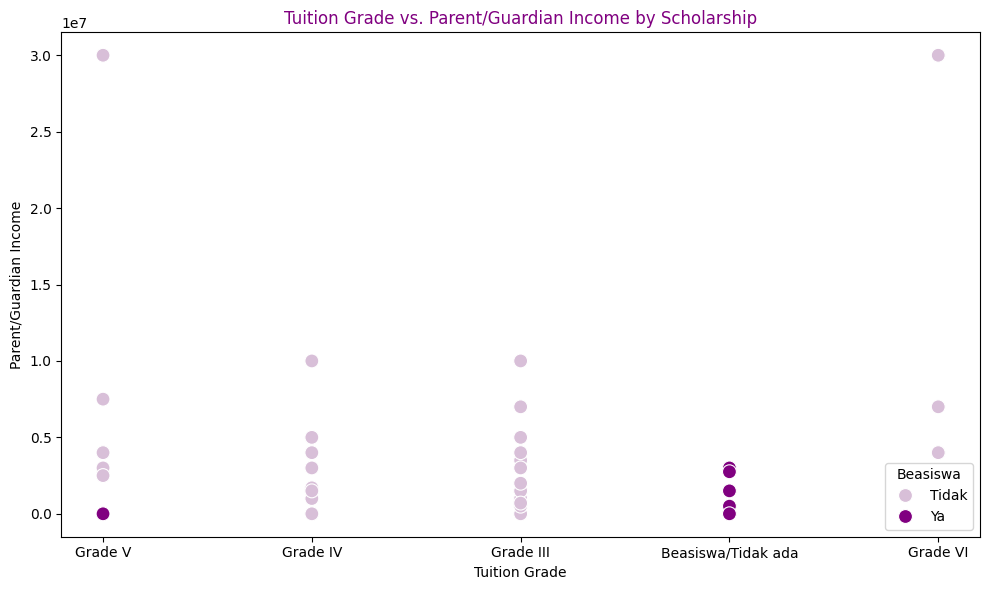

In [ ]:
plt.figure(figsize=(10,6))
# Define a custom palette: 'Tidak' is deep purple and 'Ya' is a lighter purple
palette = {"Ya": purple, "Tidak": "#D8BFD8"}
sns.scatterplot(data=unencoded_data, x="Grade UKT", y="Penghasilan Ortu/Wali",
                hue="Beasiswa", palette=palette, s=100)
plt.title("Tuition Grade vs. Parent/Guardian Income by Scholarship", color=purple)
plt.xlabel("Tuition Grade")
plt.ylabel("Parent/Guardian Income")
plt.tight_layout()
plt.show()

# Scatter Plot (Tuition Grade vs. Parent/Guardian Income by Scholarship)

1. **Lower-Income Students Are More Likely to Receive Scholarships**  
   - Dark purple dots (scholarship recipients) tend to be concentrated at lower income levels.  
   - This suggests that scholarships are primarily awarded to students from lower-income families.  

2. **Higher-Income Students Mostly Do Not Receive Scholarships**  
   - Light purple dots (non-scholarship recipients) appear more frequently at higher income levels.  
   - Some students with significantly high family incomes are not receiving scholarships, indicating a need-based distribution.  

3. **Distribution Across Tuition Grades**  
   - Scholarship recipients are spread across different tuition grades but are particularly concentrated in the "Beasiswa/Tidak ada" category.  
   - Students in Grade III, IV, and V show mixed distributions of scholarship and non-scholarship recipients.  

### Conclusion  
Scholarships appear to be awarded based on financial need, as students from lower-income families are more likely to receive them. The data also suggests that higher-income families are less dependent on scholarships, reinforcing a need-based allocation approach.

---

#

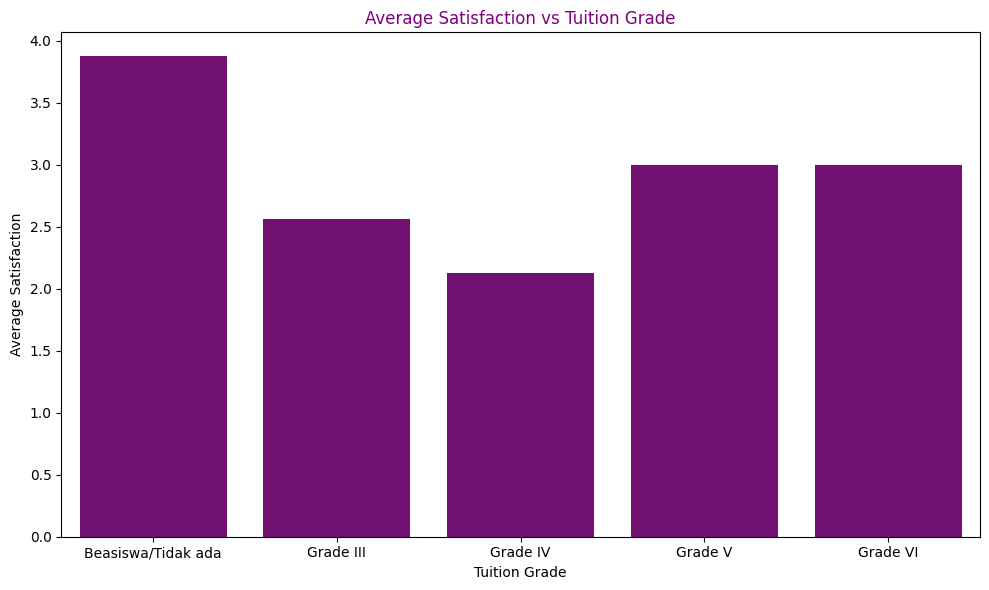

In [ ]:
# Calculate the average satisfaction for each Grade UKT
avg_kepuasan = unencoded_data.groupby("Grade UKT")["Kepuasan"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_kepuasan, x="Grade UKT", y="Kepuasan", color=purple)
plt.title("Average Satisfaction vs Tuition Grade", color=purple)
plt.ylabel("Average Satisfaction")
plt.xlabel("Tuition Grade")
plt.tight_layout()
plt.show()

# Bar Chart (Average Satisfaction vs Tuition Grade)

This bar chart presents the relationship between *tuition grade* and *average student satisfaction. The x-axis represents different tuition categories, including **scholarship recipients (Beasiswa/Tidak ada)* and various tuition grades (*Grade III, IV, V, and VI). The y-axis indicates the **average satisfaction level*.

### *Key Insights:*
1. *Students Without Tuition Fees (Scholarship Recipients) Report the Highest Satisfaction*  
   - The *"Beasiswa/Tidak ada"* category has the highest satisfaction score, nearing *4.0*.  
   - This suggests that students who receive full scholarships tend to be more satisfied, possibly due to reduced financial stress and greater academic focus.

2. *Lower Satisfaction in Mid-Tier Tuition Grades (Grade III & IV)*  
   - *Grade III and Grade IV* students have noticeably lower satisfaction, with Grade IV being the lowest.  
   - This might indicate that students in these categories face financial strain while not receiving enough benefits to compensate for higher costs.

3. *Higher Tuition Grades (Grade V & VI) Show Increased Satisfaction*  
   - *Grades V and VI* have relatively *higher satisfaction levels* compared to Grades III and IV.  
   - This could mean that students paying higher tuition fees may receive better facilities, resources, or overall academic experience.

### *Conclusion*
The data suggests a *U-shaped trend* in student satisfaction, where students with *full scholarships* are the most satisfied, those in *mid-tier tuition grades struggle the most, and those in **higher tuition grades* regain satisfaction. This could indicate the need for *better financial aid programs or improved benefits for students in mid-tier tuition categories* to balance satisfaction levels.

---

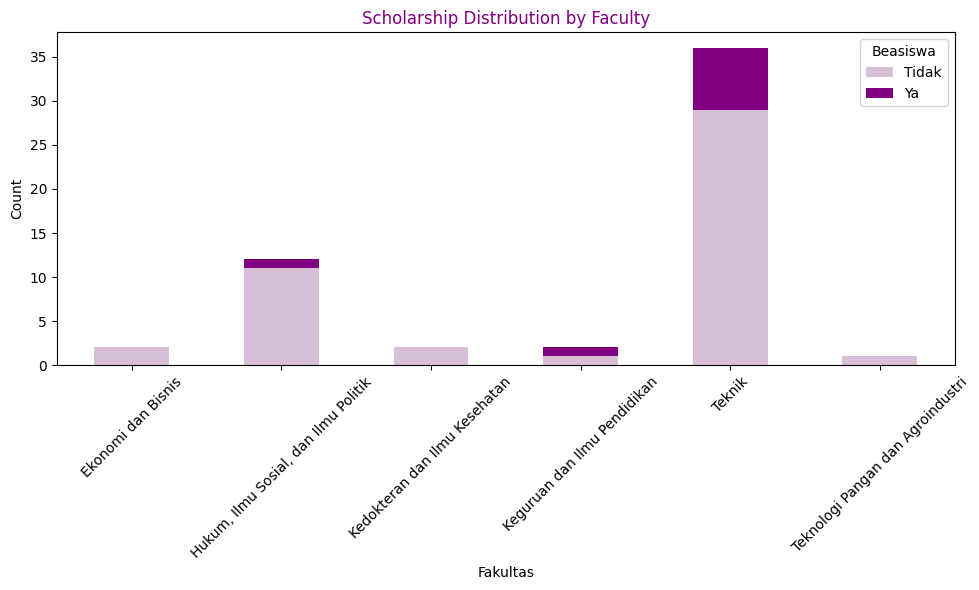

In [ ]:
# Prepare data for a stacked bar chart
scholarship_data = unencoded_data.groupby(['Fakultas', 'Beasiswa']).size().unstack(fill_value=0)

# Define your purple palette
colors = {"Ya": "#800080", "Tidak": "#D8BFD8"}

scholarship_data.plot(kind='bar', stacked=True, color=[colors.get(x) for x in scholarship_data.columns], figsize=(10,6))
plt.title("Scholarship Distribution by Faculty", color="#800080")
plt.xlabel("Fakultas")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Beasiswa")
plt.tight_layout()
plt.show()

# Scholarship Distribution by Faculty

This bar chart illustrates the distribution of students receiving scholarships across various faculties. The data is categorized into two groups:  
- *"Ya" (Yes, received a scholarship)* – Represented by the darker purple segment.  
- *"Tidak" (No, did not receive a scholarship)* – Represented by the lighter purple segment.  

### *Key Insights:*
1. *Faculty of Engineering (Teknik) Dominates in Scholarship Recipients*  
   - The *Teknik* faculty has the highest number of students overall, with a significant portion receiving scholarships.  
   - This suggests that students in engineering programs may have more access to financial aid, possibly due to program difficulty, government support, or institutional funding.

2. *Hukum, Ilmu Sosial, dan Ilmu Politik (Law, Social, and Political Sciences) Shows Moderate Scholarship Allocation*  
   - This faculty has a noticeable student count, but only a small fraction receive scholarships.  
   - This might indicate either a lower number of applicants or stricter criteria for financial aid.

3. *Low Scholarship Distribution in Other Faculties*  
   - Faculties such as *Ekonomi dan Bisnis (Economics & Business), Kedokteran dan Ilmu Kesehatan (Medicine & Health Sciences), and Teknologi Pangan dan Agroindustri (Food Technology & Agroindustry)* have very few students receiving scholarships.  
   - This could suggest limited scholarship availability, high entry requirements, or fewer applicants in these fields.

4. *Keguruan dan Ilmu Pendidikan (Education Faculty) has Minimal Scholarships*  
   - Although there are students in this faculty, only a small portion receive scholarships, potentially pointing to a lack of funding opportunities for education students.

### *Conclusion*
The *Faculty of Engineering (Teknik)* stands out as the faculty with the highest number of scholarship recipients, possibly due to high financial aid availability in STEM fields. In contrast, other faculties have fewer scholarship recipients, highlighting a disparity in scholarship distribution. This data suggests a potential need for increased scholarship accessibility across all faculties to ensure equal financial support opportunities for students.

---

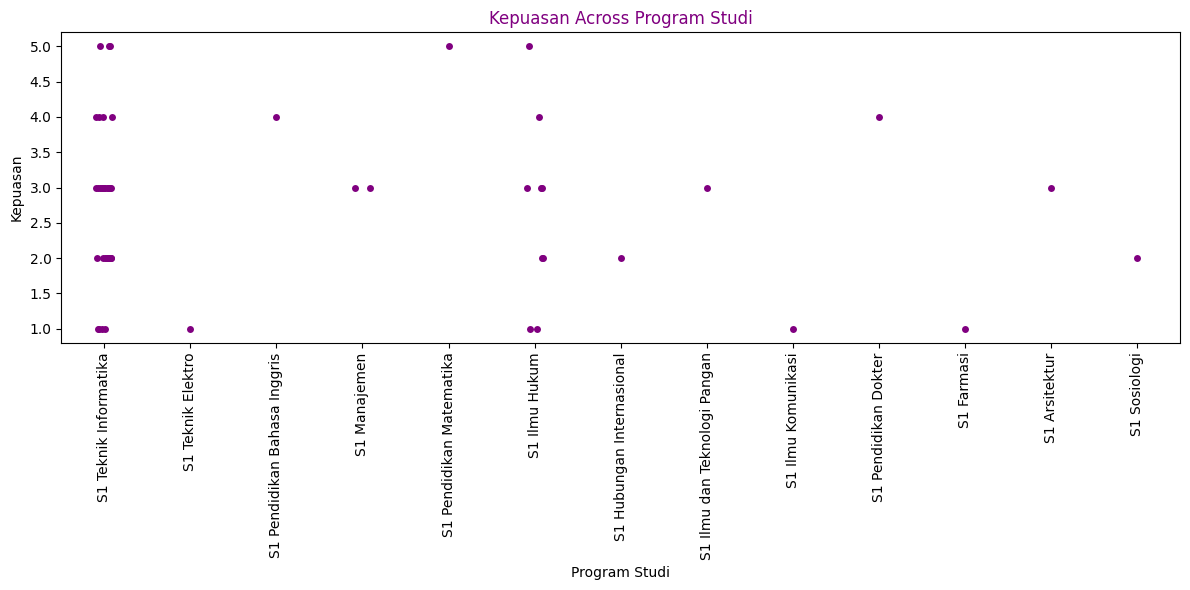

In [ ]:
plt.figure(figsize=(12,6))
sns.stripplot(data=unencoded_data, x="Program Studi", y="Kepuasan", color="#800080", jitter=True, size=5)
plt.xticks(rotation=90)
plt.title("Kepuasan Across Program Studi", color="#800080")
plt.tight_layout()
plt.show()

# Strip Plot (Satisfaction Across Study Program)

This **strip plot** visualizes student satisfaction (**Kepuasan**) across various **undergraduate study programs (Program Studi)**.  

#### **Key Observations:**  
1. **S1 Teknik Informatika (Informatics Engineering)**  
   - Has the **largest number of data points**, indicating a high number of respondents.  
   - Satisfaction scores **range from 1 to 5**, with **clusters around 3 and 4**, suggesting that most students are moderately to highly satisfied.  

2. **S1 Teknik Elektro (Electrical Engineering)**  
   - Very few data points.  
   - A notable **low satisfaction score (1)**, suggesting dissatisfaction among the few respondents.  

3. **S1 Ilmu Hukum (Law)**  
   - Scores are widely spread from **1 to 5**, indicating a **diverse range of opinions** on satisfaction.  
   - Some students are highly satisfied (5), while others are not (1).  

4. **S1 Pendidikan Dokter (Medical Education)**  
   - Few data points, but mostly **high satisfaction (score ~4)**, indicating that medical students are generally satisfied with their program.  

5. **S1 Farmasi (Pharmacy)**  
   - Very low satisfaction (score ~1).  
   - Indicates potential dissatisfaction within the pharmacy program.  

6. **S1 Arsitektur (Architecture)**  
   - Few responses but with a **higher satisfaction score (~3-4)**.  

7. **Overall Trends**  
   - Some programs have **a wide spread of satisfaction levels**, while others, like **Pharmacy and Electrical Engineering**, have **low satisfaction scores**.  
   - Programs with a **higher number of responses (e.g., Informatics)** tend to have **more balanced satisfaction distributions**.  

### **Conclusions:**  
- Informatics and Law have **a wide range of satisfaction levels**, while some programs like **Pharmacy and Electrical Engineering show dissatisfaction**.  
- Medicine and Architecture generally indicate **higher satisfaction**.  
- Further investigation may be needed to **identify factors influencing satisfaction levels**, such as curriculum, facilities, or faculty engagement.

---

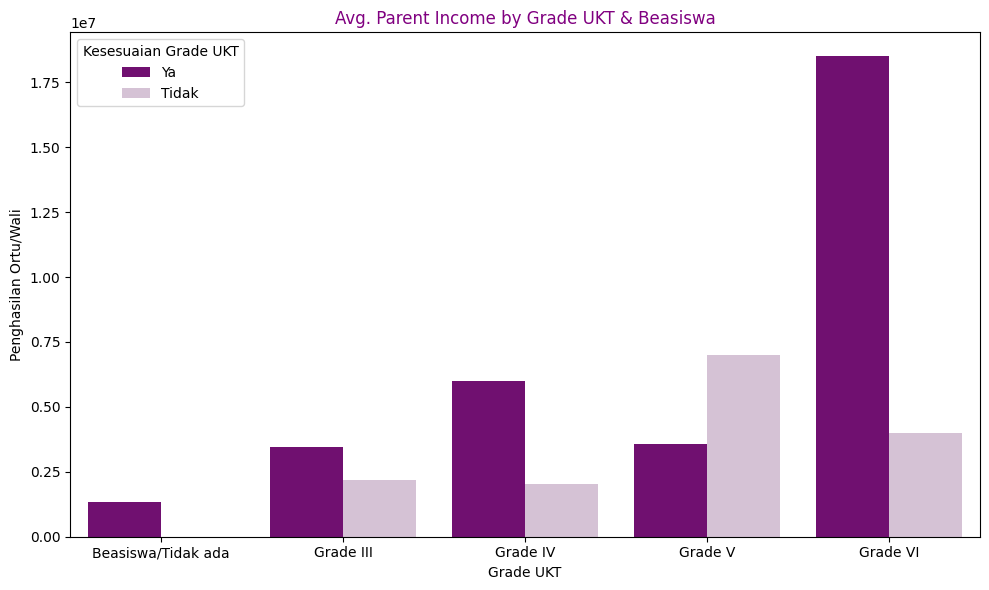

In [ ]:
# Calculate average parent income per Grade UKT and Beasiswa
avg_income = unencoded_data.groupby(["Grade UKT", "Kesesuaian Grade UKT"])["Penghasilan Ortu/Wali"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_income, x="Grade UKT", y="Penghasilan Ortu/Wali", hue="Kesesuaian Grade UKT",
            palette={"Ya": "#800080", "Tidak": "#D8BFD8"})
plt.title("Avg. Parent Income by Grade UKT & Beasiswa", color="#800080")
plt.tight_layout()
plt.show()

# Bar Chart (Average Parent Income by Grade UKT & Beasiswa)
### **Analysis of the Chart: Avg. Parent Income by Grade UKT & Scholarship**  

This chart displays the **average parental income** based on **UKT Grade** and **UKT Grade Appropriateness** (whether the assigned UKT grade matches the parent's income).  

#### **1. General Trends**  
- **The higher the UKT Grade, the higher the average parental income.**  
  - This aligns with the concept that higher UKT grades are assigned to students from wealthier backgrounds.  
- **Each UKT Grade has two categories:**  
  - **"Yes"** (dark purple) represents students whose UKT Grade matches their parental income.  
  - **"No"** (light purple) represents students whose UKT Grade does not match their parental income.  

#### **2. Comparison by UKT Grade**  
- **Scholarship/No UKT**  
  - The average parental income is relatively low, indicating that students with scholarships tend to come from lower-income families.  
- **Grade III & IV**  
  - Students whose UKT Grade matches their income ("Yes") have higher average parental income compared to those whose UKT Grade does not match ("No").  
- **Grade V**  
  - Interestingly, the average parental income for the "No" category is higher than for the "Yes" category.  
  - This suggests that some students with high parental income receive a lower-than-expected UKT Grade.  
- **Grade VI**  
  - Students whose UKT Grade matches their income ("Yes") have significantly higher parental income than those in the "No" category.  
  - This is consistent with the UKT system, where Grade VI is assigned to students from the highest economic background.  

#### **3. Conclusions**  
- **There is a strong relationship between parental income and UKT Grade,** but some cases show students receiving a lower UKT Grade than expected.  
- **Scholarships are more commonly awarded to students with lower parental income.**  
- **An anomaly appears in Grade V,** where students with unmatched UKT Grades tend to have higher parental income.  

This chart can be used to evaluate whether the distribution of UKT is aligned with policies or if there are inconsistencies in determining UKT Grades based on parental income.

---

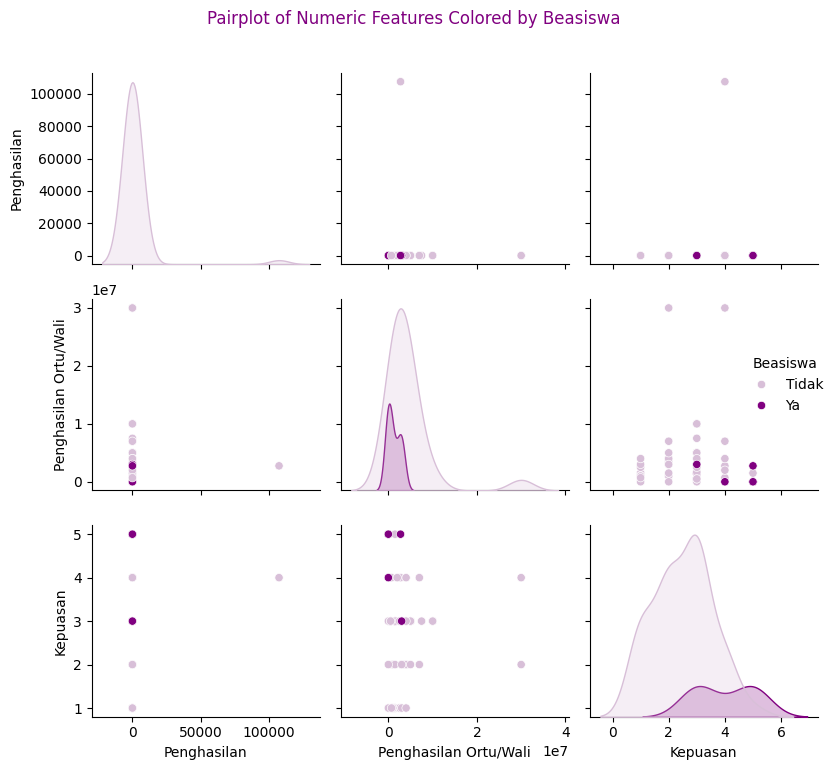

In [ ]:
sns.pairplot(unencoded_data, vars=["Penghasilan", "Penghasilan Ortu/Wali", "Kepuasan"], hue="Beasiswa",
             palette={"Ya": "#800080", "Tidak": "#D8BFD8"})
plt.suptitle("Pairplot of Numeric Features Colored by Beasiswa", y=1.02, color="#800080")
plt.tight_layout()
plt.show()

# Pairplot of Numeric Features Colored by Beasiswa
### **Analysis of the Pairplot: Numeric Features Colored by Scholarship**  

This pairplot visualizes the relationships between three numeric variables:  
1. **Penghasilan (Income)**  
2. **Penghasilan Ortu/Wali (Parental Income)**  
3. **Kepuasan (Satisfaction)**  
- The data points are colored based on whether the student receives a **scholarship (Beasiswa)**.  
  - **Dark purple (Ya):** Students who receive scholarships.  
  - **Light purple (Tidak):** Students who do not receive scholarships.  

#### **1. Relationship Between "Penghasilan" and "Penghasilan Ortu/Wali"**  
- There is a **wide range of parental income values**, with most values clustered in the lower range.  
- **Scholarship recipients tend to have lower parental incomes**, which aligns with the expectation that scholarships are awarded to students from financially disadvantaged backgrounds.  
- There are a few **outliers with very high parental incomes** who do not receive scholarships.  

#### **2. Relationship Between "Penghasilan" and "Kepuasan"**  
- **Satisfaction (Kepuasan) does not seem strongly correlated with individual income (Penghasilan).**  
- Scholarship recipients are spread across different satisfaction levels, suggesting that financial aid does not necessarily determine student satisfaction.  

#### **3. Relationship Between "Penghasilan Ortu/Wali" and "Kepuasan"**  
- **Most students, regardless of their parental income, have varied satisfaction levels.**  
- A slight trend indicates that students with **lower parental incomes who receive scholarships** might have slightly **higher satisfaction levels** than those who do not.  
- However, satisfaction is likely influenced by other factors beyond financial background.  

#### **4. Density Plots (Diagonal Subplots)**  
- **Parental income (Penghasilan Ortu/Wali) has a skewed distribution,** with most students coming from lower-income families.  
- **Scholarship recipients are concentrated in the lower-income group.**  
- **Satisfaction is more evenly distributed,** though scholarship recipients may show a slight peak at higher satisfaction levels.  

### **Conclusions**  
- **Scholarships are primarily awarded to students from lower-income families.**  
- **Parental income has a stronger correlation with scholarships than with satisfaction.**  
- **Satisfaction does not seem to be strongly influenced by financial factors alone, indicating other factors like academic environment or personal preferences play a role.**  

This analysis can help assess whether **scholarship allocation is aligned with financial need** and whether **satisfaction is influenced by financial aid or other university-related factors.**

---

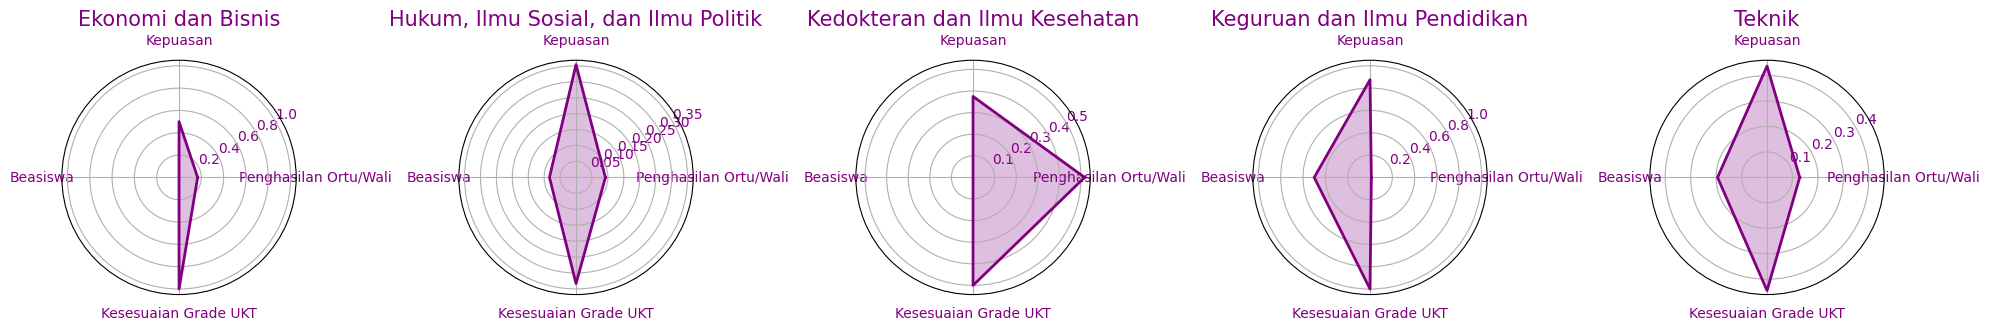

In [ ]:
# Remove rows with 'Teknologi Pangan dan Agroindustri' in the Fakultas column, no insights.
unencoded_data = unencoded_data[unencoded_data["Fakultas"] != "Teknologi Pangan dan Agroindustri"]

# Define the numeric metrics
numeric_metrics = ['Penghasilan Ortu/Wali', 'Kepuasan', 'Beasiswa', 'Kesesuaian Grade UKT']

# Function for min-max normalization
def normalize_series(s):
    return (s - s.min()) / (s.max() - s.min())

# Create normalized versions of the numeric columns
for col in numeric_metrics:
    unencoded_data[col + '_norm'] = normalize_series(encoded_data[col])

# Group by Fakultas using the normalized columns
norm_cols = [col + '_norm' for col in numeric_metrics]
grouped_norm = unencoded_data.groupby("Fakultas")[norm_cols].mean().reset_index()

# Prepare the radar chart parameters
metrics_norm = norm_cols  # These are the normalized metrics we will plot
num_vars = len(metrics_norm)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Function to create a radar chart on a given axis
def create_radar_chart(ax, values, label, color):
    # Repeat the first value to close the radar chart loop
    values = values.tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, label=label)
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.set_xticks(angles[:-1])
    # Use original metric names as labels
    ax.set_xticklabels(numeric_metrics, color=color)
    ax.set_rlabel_position(30)
    ax.tick_params(colors=color)
    ax.set_title(label, color=color, size=15, pad=25)

# Create a subplot for each Fakultas
num_faculties = len(grouped_norm)
fig, axs = plt.subplots(1, num_faculties, subplot_kw=dict(polar=True), figsize=(num_faculties * 4, 4))
if num_faculties == 1:
    axs = [axs]

# Loop through each Fakultas and plot the corresponding radar chart
for ax, (_, row) in zip(axs, grouped_norm.iterrows()):
    values = row[metrics_norm].values
    create_radar_chart(ax, values, row['Fakultas'], purple)

plt.tight_layout()
plt.show()

# Radar Chart: Comparison of Faculties Based on Normalized Metrics  

### **Overview**  
This radar chart visualizes the comparison of faculties based on four key metrics:  
1. **Penghasilan Ortu/Wali (Parental Income)**  
2. **Kepuasan (Student Satisfaction)**  
3. **Beasiswa (Scholarship Recipients)**  
4. **Kesesuaian Grade UKT (Tuition Fee Suitability)**  

The data has been **normalized** using Min-Max Normalization to allow fair comparison across different scales. Faculties are plotted separately, showing their relative performance in each metric.  

### **What the Radar Chart Shows**  
- Each faculty has its own radar chart, displaying **average normalized values** for the four metrics.  
- The shape of each chart reveals the **strengths and weaknesses** of a faculty in comparison to others.  
- A **larger area** means the faculty scores higher on those metrics, while a **smaller area** indicates lower values.  

### **Observations**  
- Faculties with higher **scholarship recipients** might have lower **parental income**, showing a financial need-based allocation.  
- **Satisfaction levels** vary among faculties, suggesting that financial factors alone do not determine student happiness.  
- Differences in **tuition fee suitability** may indicate variations in financial policies across faculties.  

### **Conclusion**  
This radar chart helps to identify patterns in student finances, satisfaction, and scholarship distribution among faculties. The insights gained can be used to evaluate financial aid policies and understand student experiences better.

---
